# Part 1: Getting started [3 Marks]

In [ ]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Cases.csv',
    index_col=0,
    thousands=','
)

1. Plot the time-series for the `US`, `China`, ` Canada`, and 7 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country. **[1]**
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Plot the standardized time-series for the same countries as you chose in `Step 1`. **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. Why does it man if the curve goes up or down? What do negative and positive values mean? **[1]** **If the curve goes up, it means that number of cases grows faster and vice versa. Positive value means number of cases is more than average on that day and negative means number of cases is lower than average on that day.**

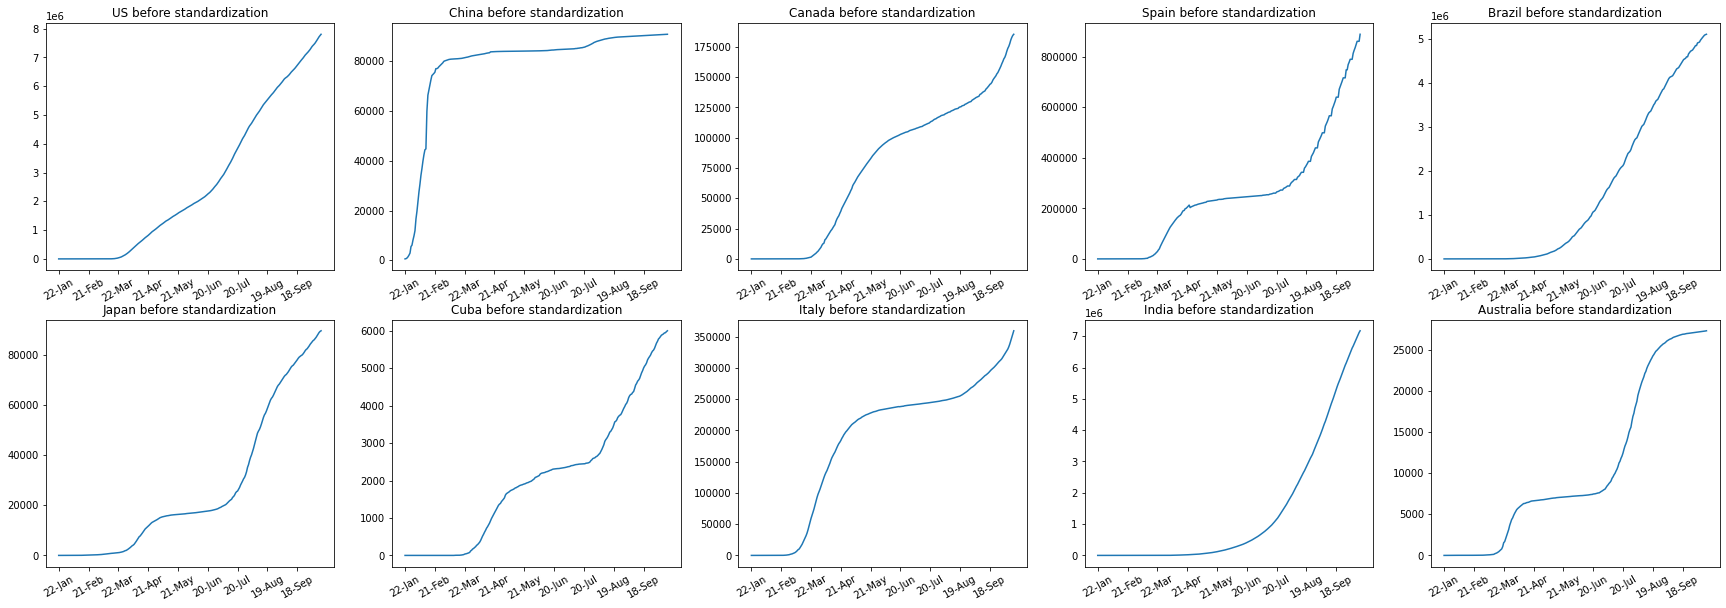

In [ ]:
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
country_list=['US','China','Canada','Spain','Brazil','Japan','Cuba','Italy','India','Australia']
dates=cases_raw.columns
fig,axes=plt.subplots(2,5,figsize=[30,10])
axr=axes.ravel()
for i in range(10):
    country=country_list[i]
    axr[i].plot(cases_raw.loc[country,:])
    axr[i].set_title('{} before standardization'.format(country))
    labels=[x for x in range(0,265,30)]
    axr[i].set_xticks(labels)
    axr[i].set_xticklabels(dates[labels],rotation=30)



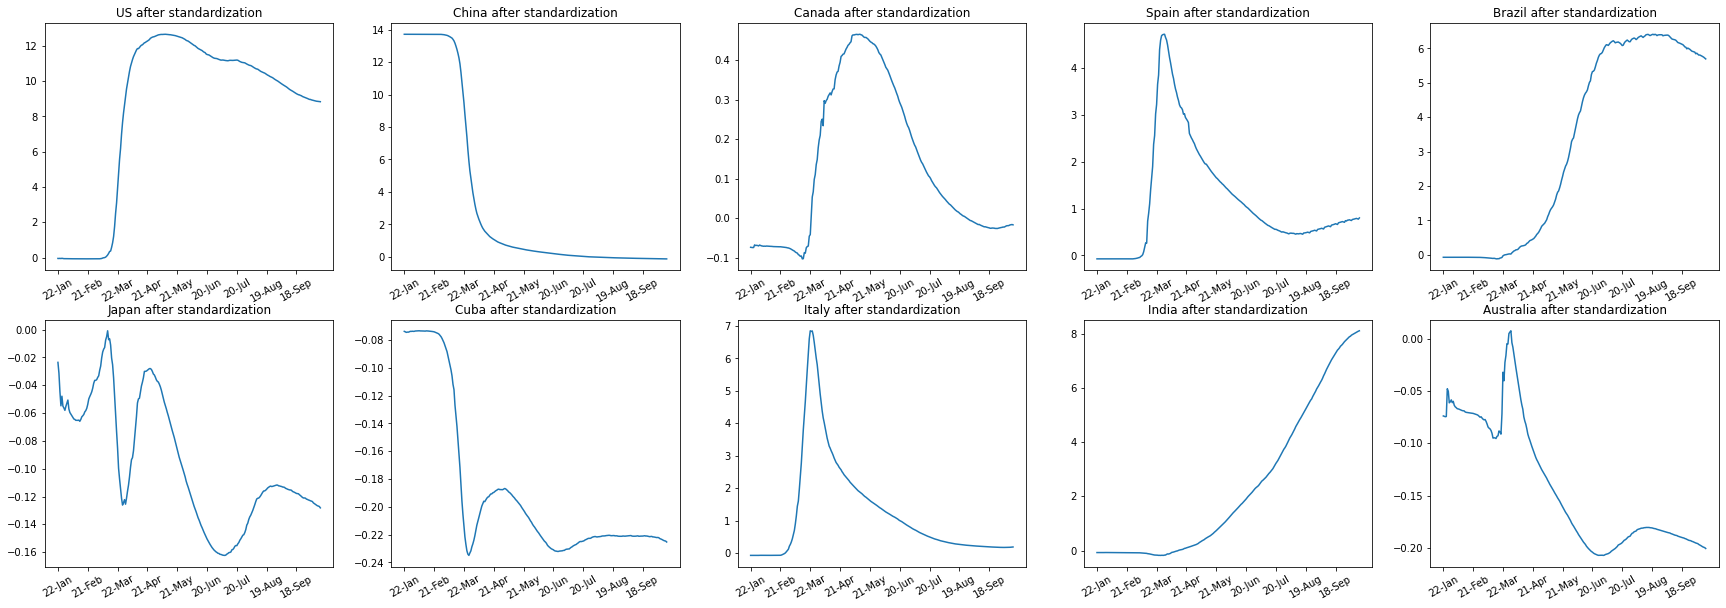

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=cases_raw.values
dates=cases_raw.columns
data_standardized=scaler.fit_transform(data)
cases_standardized=pd.DataFrame(data_standardized,columns=dates,index=cases_raw.index)
fig,axes=plt.subplots(2,5,figsize=[30,10])
axr=axes.ravel()
for i in range(10):
    country=country_list[i]
    country_data=cases_standardized.loc[country,:]
    axr[i].plot(country_data)
    axr[i].set_title('{} after standardization'.format(country))
    labels=[x for x in range(0,265,30)]
    axr[i].set_xticks(labels)
    axr[i].set_xticklabels(dates[labels],rotation=30)



# Part 2: Applying PCA [3 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (265, 265).* **[0.5]**
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.5]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`. **[0.5]**
4. How many PCs do you need to cover 99\% of the dataset's variance? **[0.5]** **4 PCs are enough to cover 99% of variance.**
5. Show the first 20 principal components (Eigenvectors) plotted as a time series (20 subplots). **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]** **For the first few PCs, the curve is smooth but after PC8 the curve becomes pretty noisy and each curve has similar shape.**

In [ ]:
### YOUR CODE HERE ###
import numpy as np
n,m=data_standardized.shape
C = np.dot(data_standardized.T, data_standardized) / (n-1) 
eigenValues, eigenVectors = np.linalg.eigh(C) 

In [ ]:
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]
s=sum(eigenValues)
covered_variance=[x/s for x in eigenValues]
cum_variance=np.cumsum(covered_variance)

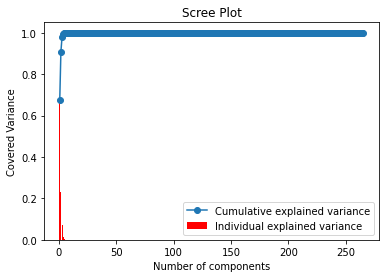

In [ ]:
plt.plot(np.arange(1,266),cum_variance,'o-',label='Cumulative explained variance')
plt.bar(np.arange(1,266),covered_variance,color='r',label='Individual explained variance')
plt.title('Scree Plot')
plt.ylabel('Covered Variance')
plt.xlabel('Number of components')
plt.legend()

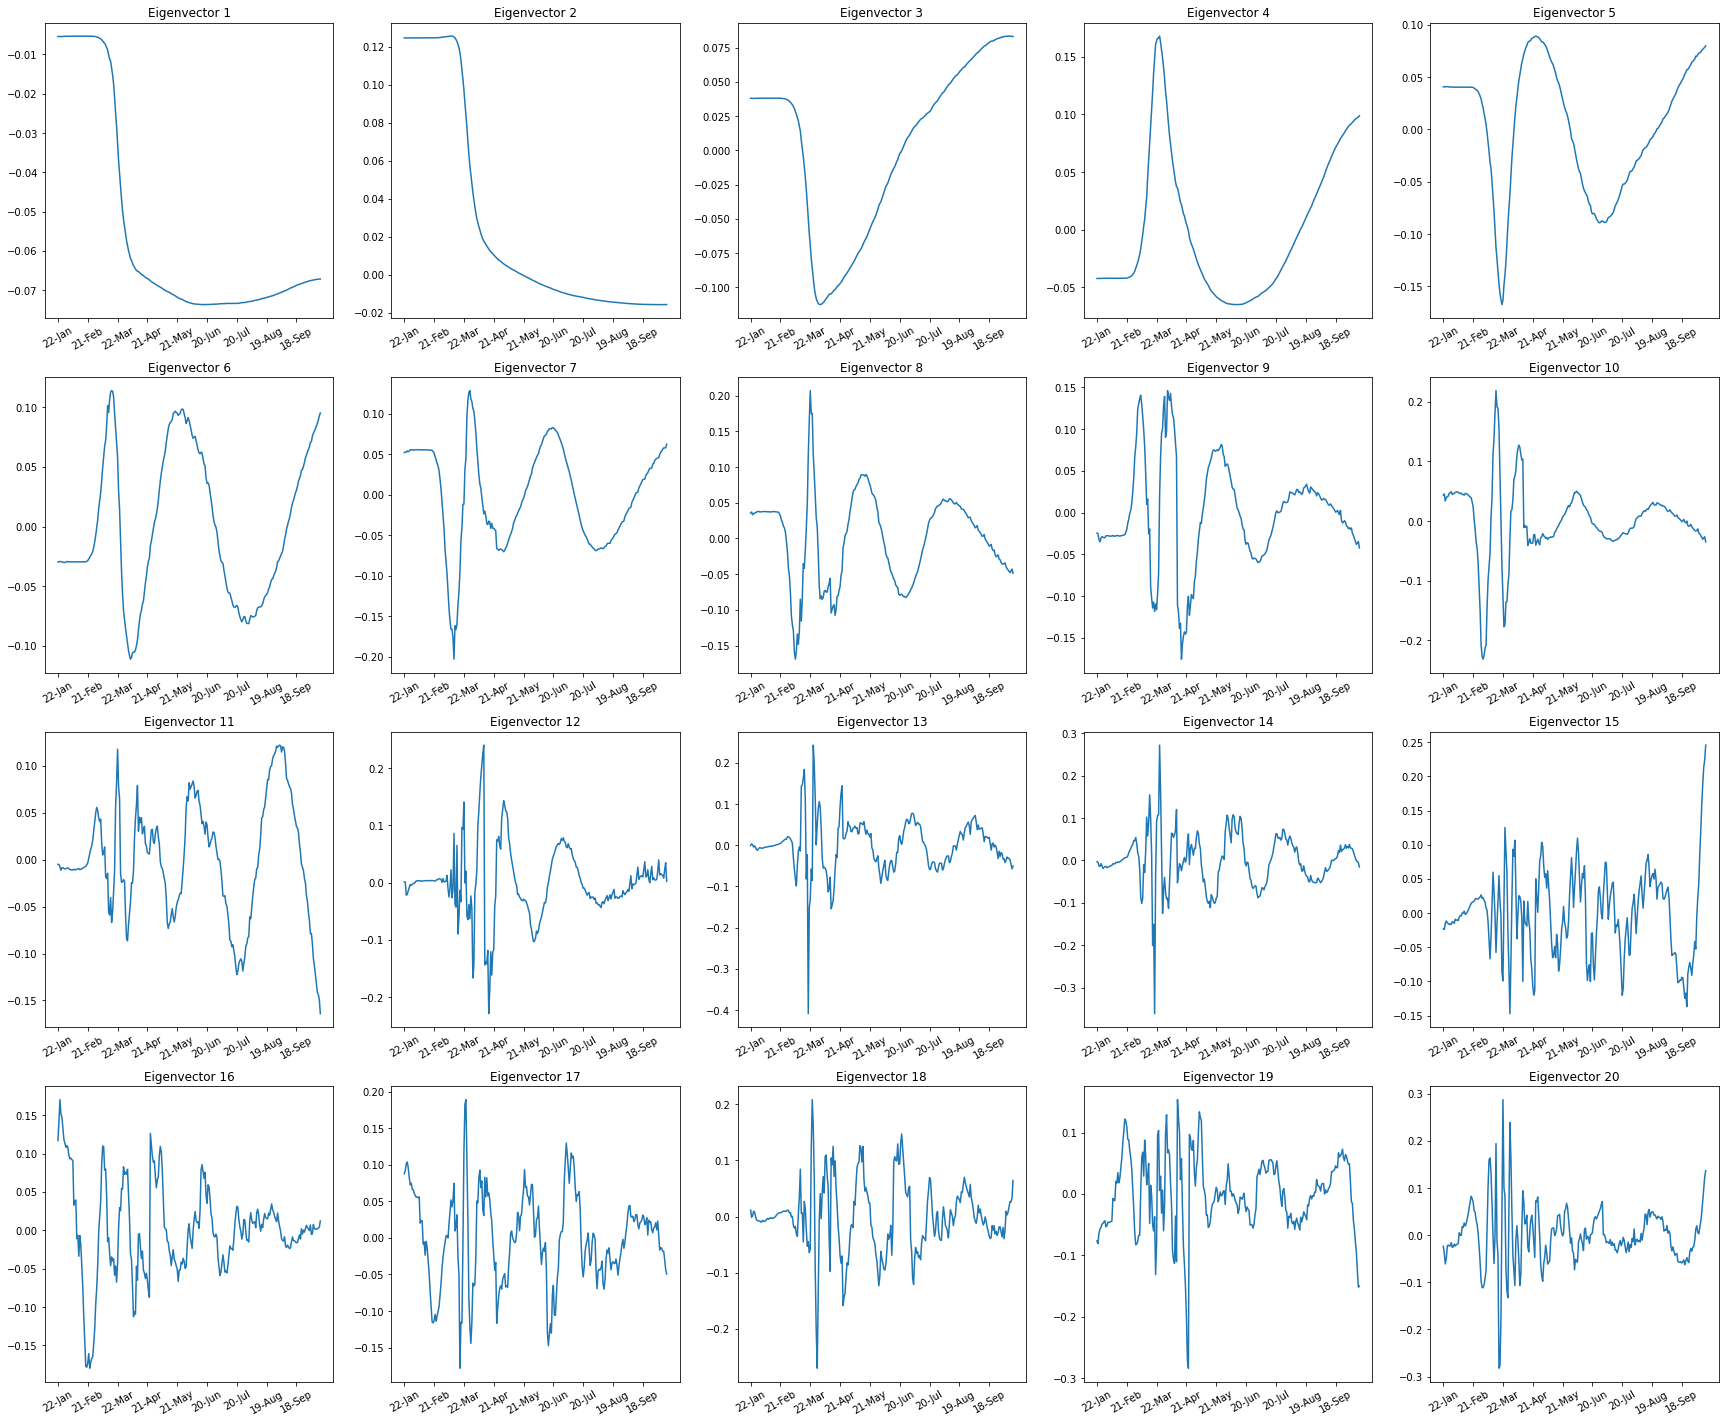

In [ ]:
fig,axes=plt.subplots(4,5,figsize=[30,25])
axr=axes.ravel()
for i in range(20):
    data=eigenVectors[:,i]
    axr[i].plot(data)
    axr[i].set_title('Eigenvector {}'.format(i+1))
    labels=[x for x in range(0,265,30)]
    axr[i].set_xticks(labels)
    axr[i].set_xticklabels(dates[labels],rotation=30)

# Part 3: Data reconstruction [6 Marks]

Create a function that:

*   Accepts a country name as an input.
*   Plots 4 figures:
1.   The standardized time-series for the specified country. **[0.5]**
2.   The incremental reconstruction of the standardized time-series for the specified country in a single plot with the 10 first principal components (10 curves: the first curve a reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). **[2]**
3.   The residual error of reconstruction for each of the 10 reconstructions with respect to the standardized time-series. **[1]**
4.   The RMSE of reconstruction as a function of number of included components. **[1]**

*   Prints how many PCs are needed so that the RMSE would be less than $1$, $0.1$ and $0.01$. **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [ ]:
### YOUR CODE HERE ###
from sklearn.metrics import mean_squared_error
def pca(country):
    country_index=np.where(cases_standardized.index==country)
    fig,axes=plt.subplots(4,1,figsize=[10,20])
    axr=axes.ravel()
    country_data=cases_standardized.iloc[country_index[0][0],:]
    axr[0].plot(country_data)
    axr[0].set_title('Standardized Time Series')
    labels=[x for x in range(0,265,30)]
    axr[0].set_xticks(labels)
    axr[0].set_xticklabels(dates[labels],rotation=30)
    n,m=data_standardized.shape
    C = np.dot(data_standardized.T, data_standardized) / (n-1) 
    eigenValues, eigenVectors = np.linalg.eigh(C) 
    args = (-eigenValues).argsort()
    eigenValues = eigenValues[args]
    eigenVectors = eigenVectors[:, args]
    true_value=data_standardized[country_index]
    RMSE=[]
    for i in range(10):
        W=eigenVectors[:,:i+1]
        projX=np.dot(data_standardized,W)
        ReconX = np.dot(projX, W.T)
        result=ReconX[country_index][0]
        residual_error=true_value-result
        axr[1].plot(ReconX[country_index][0],label='CumPC{}'.format(i+1))
        axr[2].plot(residual_error[0],label='CumPC{}'.format(i+1))
    axr[1].set_title('Cumulative Reconstruction')
    labels=[x for x in range(0,265,30)]
    axr[1].set_xticks(labels)
    axr[1].set_xticklabels(dates[labels],rotation=30)
    axr[1].legend()
    axr[2].set_title('Residual Error')
    axr[2].set_xticks(labels)
    axr[2].set_xticklabels(dates[labels],rotation=30)
    axr[2].legend()
    for i in range(265):
        W=eigenVectors[:,:i+1]
        projX=np.dot(data_standardized,W)
        ReconX = np.dot(projX, W.T)
        result=ReconX[country_index][0]
        RMSE.append(np.sqrt(mean_squared_error(true_value[0],result)))
    for i,each in enumerate(RMSE):
        if each < 1:
            print('Number of PCs required for RMSE < 1: {}'.format(i+1))
            break
    for i,each in enumerate(RMSE):
        if each < 0.1:
            print('Number of PCs required for RMSE < 0.1: {}'.format(i+1))
            break
    for i,each in enumerate(RMSE):
        if each < 0.01:
            print('Number of PCs required for RMSE < 0.01: {}'.format(i+1))
            break
    
    axr[3].plot(np.arange(1,266),RMSE)
    axr[3].set_title('RMSE')
    axr[3].set_xlabel('Number of component')


Number of PCs required for RMSE < 1: 3
Number of PCs required for RMSE < 0.1: 5
Number of PCs required for RMSE < 0.01: 8


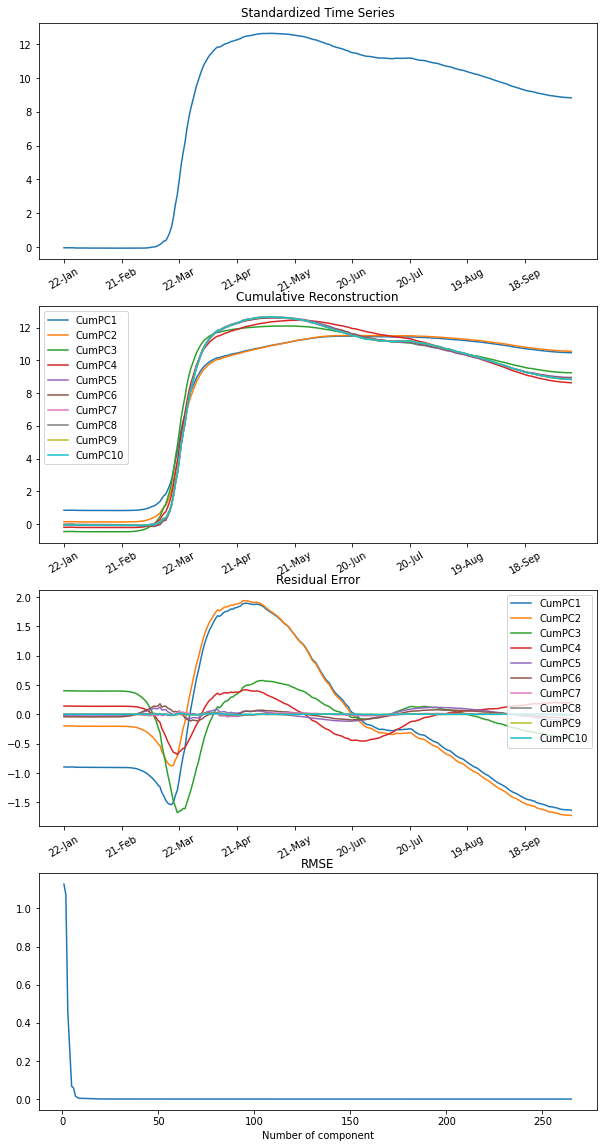

In [ ]:
pca('US')

Number of PCs required for RMSE < 1: 2
Number of PCs required for RMSE < 0.1: 4
Number of PCs required for RMSE < 0.01: 5


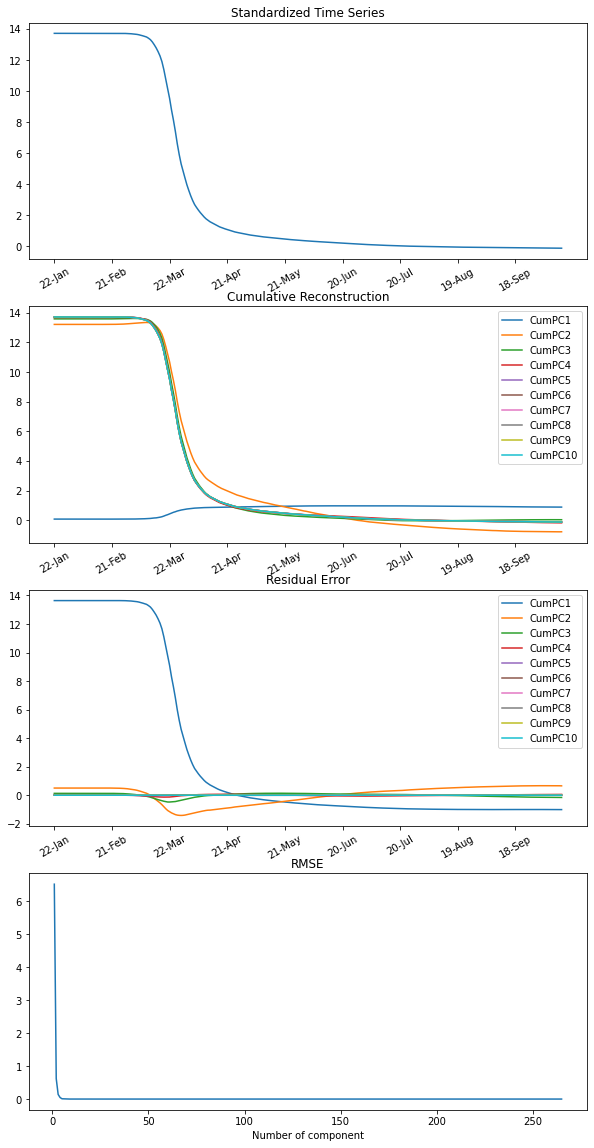

In [ ]:
pca('China')

Number of PCs required for RMSE < 1: 1
Number of PCs required for RMSE < 0.1: 3
Number of PCs required for RMSE < 0.01: 7


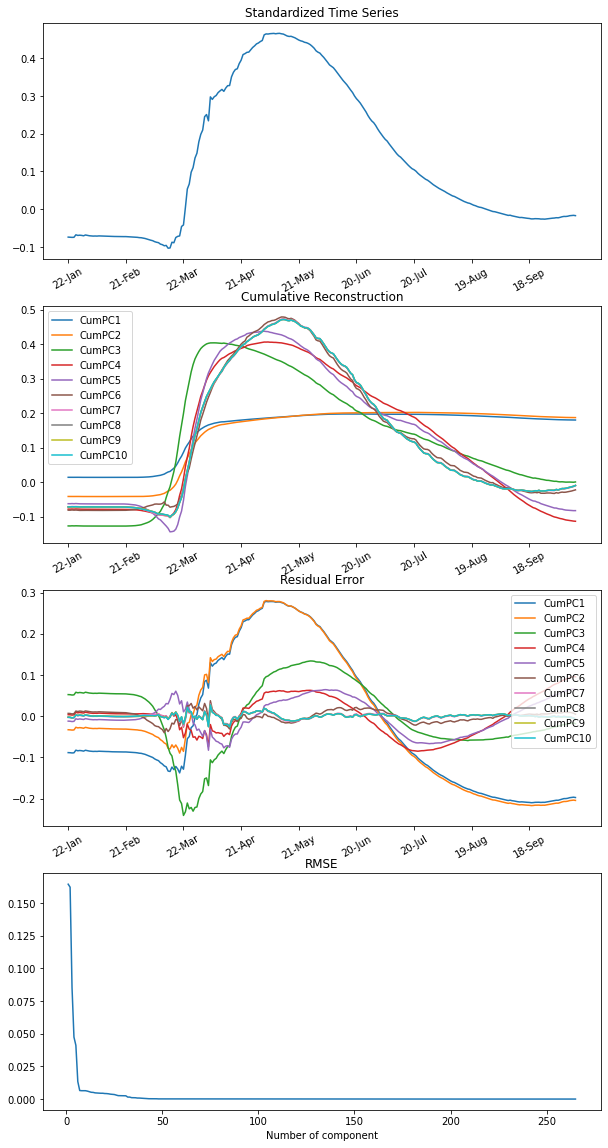

In [ ]:
pca('Canada')

# Part 4: Time-series analysis on death cases [3 Marks]
Here we'll use another dataset for total deaths caused by COVID-19 for different countries. 

Call the function that you designed in *Part 3* with this new dataset. To do that you'll first need to preprocess the data (follow the steps we have in Parts 1 and 2) **[1]** and prepare the data for calling the Part 3 function **[1]**. Test your function with the new dataset, with the `US`, `Canada`, and `China`. **[1]**


In [ ]:
import pandas as pd
death_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/COVID-OCT_Dead.csv',
    index_col=0,
    thousands=','
)

In [ ]:
### YOUR CODE HERE ###
data=death_raw.values
dates=death_raw.columns
data_standardized=scaler.fit_transform(data)
cases_standardized=pd.DataFrame(data_standardized,columns=dates,index=death_raw.index)
n,m=data_standardized.shape
C = np.dot(data_standardized.T, data_standardized) / (n-1) 
eigenValues, eigenVectors = np.linalg.eigh(C) 
args = (-eigenValues).argsort()
eigenValues = eigenValues[args]
eigenVectors = eigenVectors[:, args]


Number of PCs required for RMSE < 1: 2
Number of PCs required for RMSE < 0.1: 6
Number of PCs required for RMSE < 0.01: 8


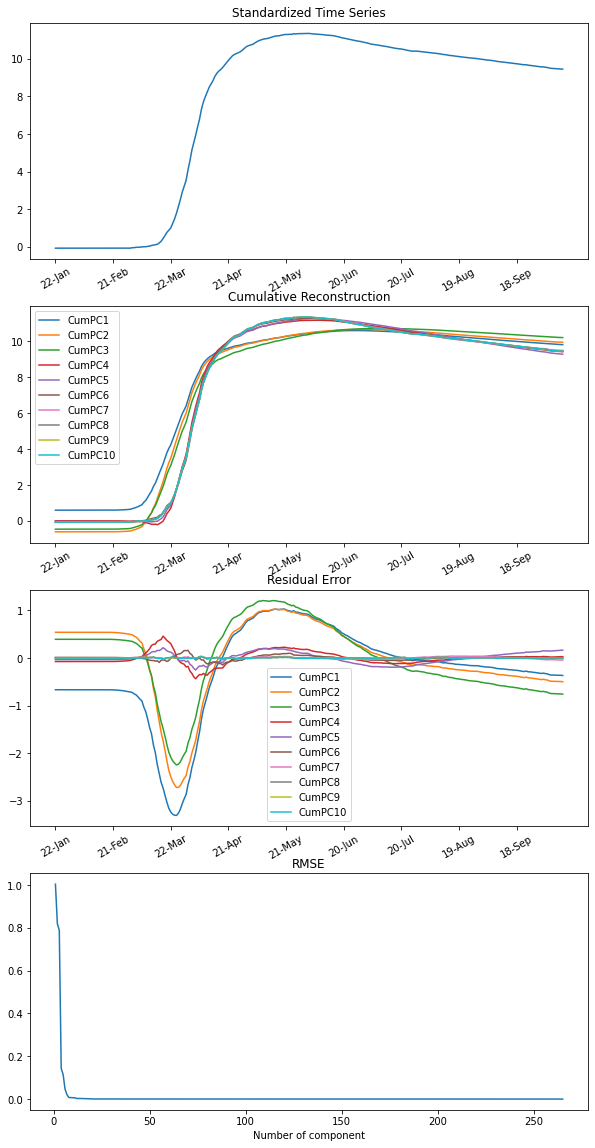

In [ ]:
pca('US')

Number of PCs required for RMSE < 1: 2
Number of PCs required for RMSE < 0.1: 4
Number of PCs required for RMSE < 0.01: 5


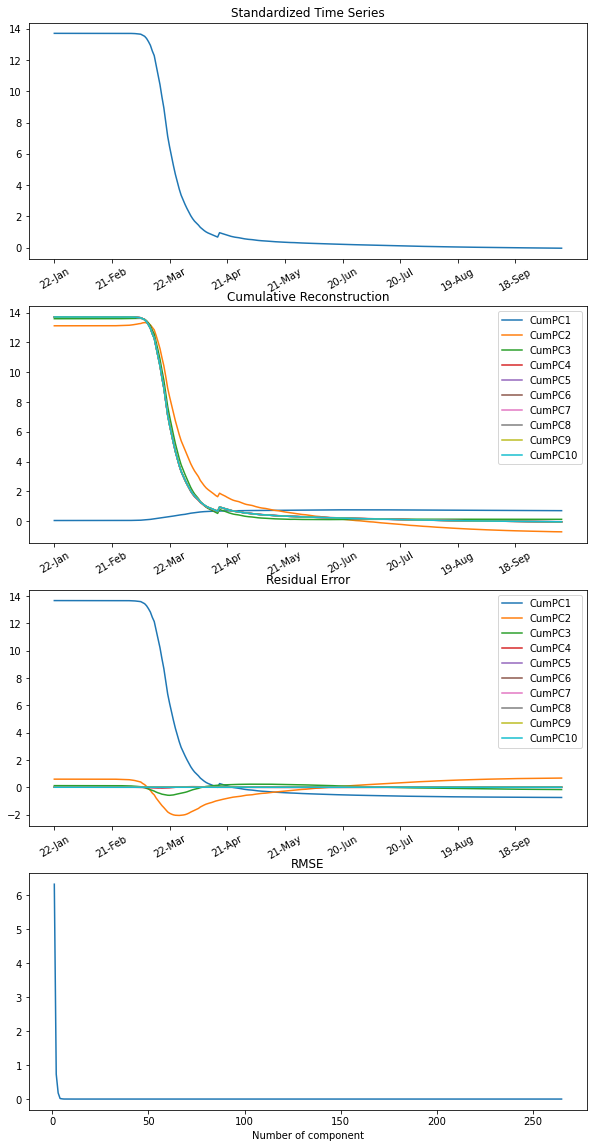

In [ ]:
pca('China')

Number of PCs required for RMSE < 1: 1
Number of PCs required for RMSE < 0.1: 5
Number of PCs required for RMSE < 0.01: 11


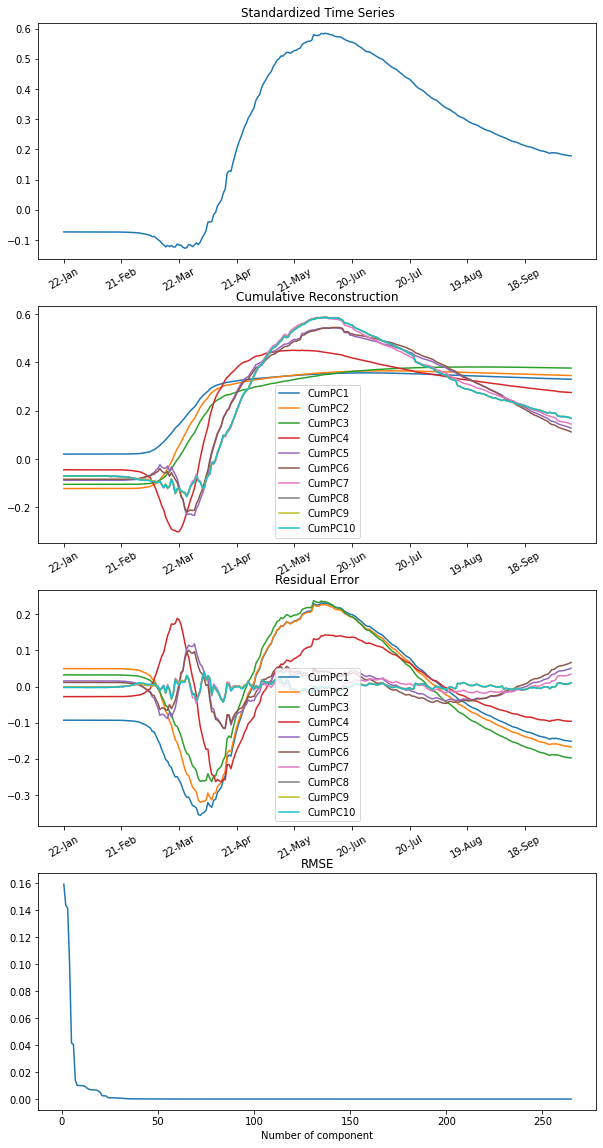

In [ ]:
pca('Canada')

# Part 5: MNIST dataset [5 Marks]
MNIST is a dataset for hand-written digits recognition. 
Each image in MNIST has 28x28 pixels which can be represented in the form of an array with 784 elements. In this part we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Compute the covariance of the dataframe and perform eigendecomposition.  **[1]**
* Plot the first 10 eigenvectors. What trends do you observe? **[1]** **Each eigenvector looks like a different number or the combination of different numbers.**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as $n$ plots of its incremental reconstruction (a first reconstruction with PC1, the second with PC1+PC2, the third with PC1+PC2+PC3, etc.). **[1]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits. **[1]**
* With that many components, what would be the compression ratio for a dataset with 1000 images? *Hint: compare the dataset size with a case where we only use principal components and projections* **[1]** **The number of components I picked is 30, therefore, compression ratio can be calculated as: 1000x28x28/(28x28x30+1000x30)=14.65**

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

In [ ]:
x.shape

(1000, 784)

Label is: 4


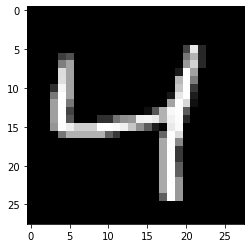

In [ ]:
x.shape
import matplotlib.pyplot as plt 
plt.gray() 
plt.imshow(x[2].reshape(28,28)) 
print ("Label is:", y[2])
plt.show() 

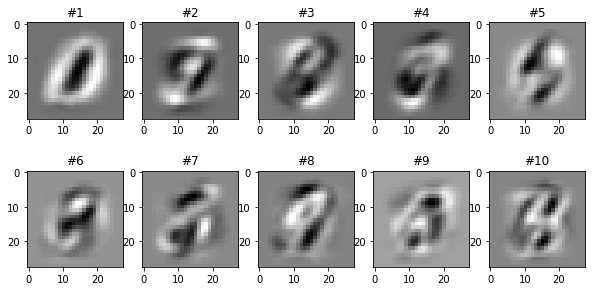

In [ ]:
### YOUR CODE HERE ###
mu = x.mean(axis=0)
X=x-mu
C = np.dot(X.T,X)
eigenValues, eigenVectors = np.linalg.eigh(C)
idx = np.argsort(-eigenValues)
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, idx]
fig,axes=plt.subplots(2,5,figsize=[10,5])
axr=axes.ravel()
for i in range(10):
    axr[i].imshow(eigenVectors[:, i].reshape(28,28), cmap = plt.cm.gray)
    axr[i].set_title('#{}'.format(i+1))

In [ ]:
def reconstruction(n):
    r=np.random.randint(0,1000)
    X=x[r]
    fig,axes=plt.subplots(int(n/5)+1,5,figsize=(20,20))
    axr=axes.ravel()
    axr[0].imshow(x[r].reshape(28,28)) 
    axr[0].set_title('Original Image')
    for i in range(1,n+1):
        ev=eigenVectors[:,:i]
        Proj=np.dot((X.reshape(1,-1)-mu),ev)
        Recon=np.dot(Proj,ev.T)+mu
        axr[i].imshow(Recon.reshape(28,28))
        axr[i].set_title('#{}'.format(i))
    fig.tight_layout()




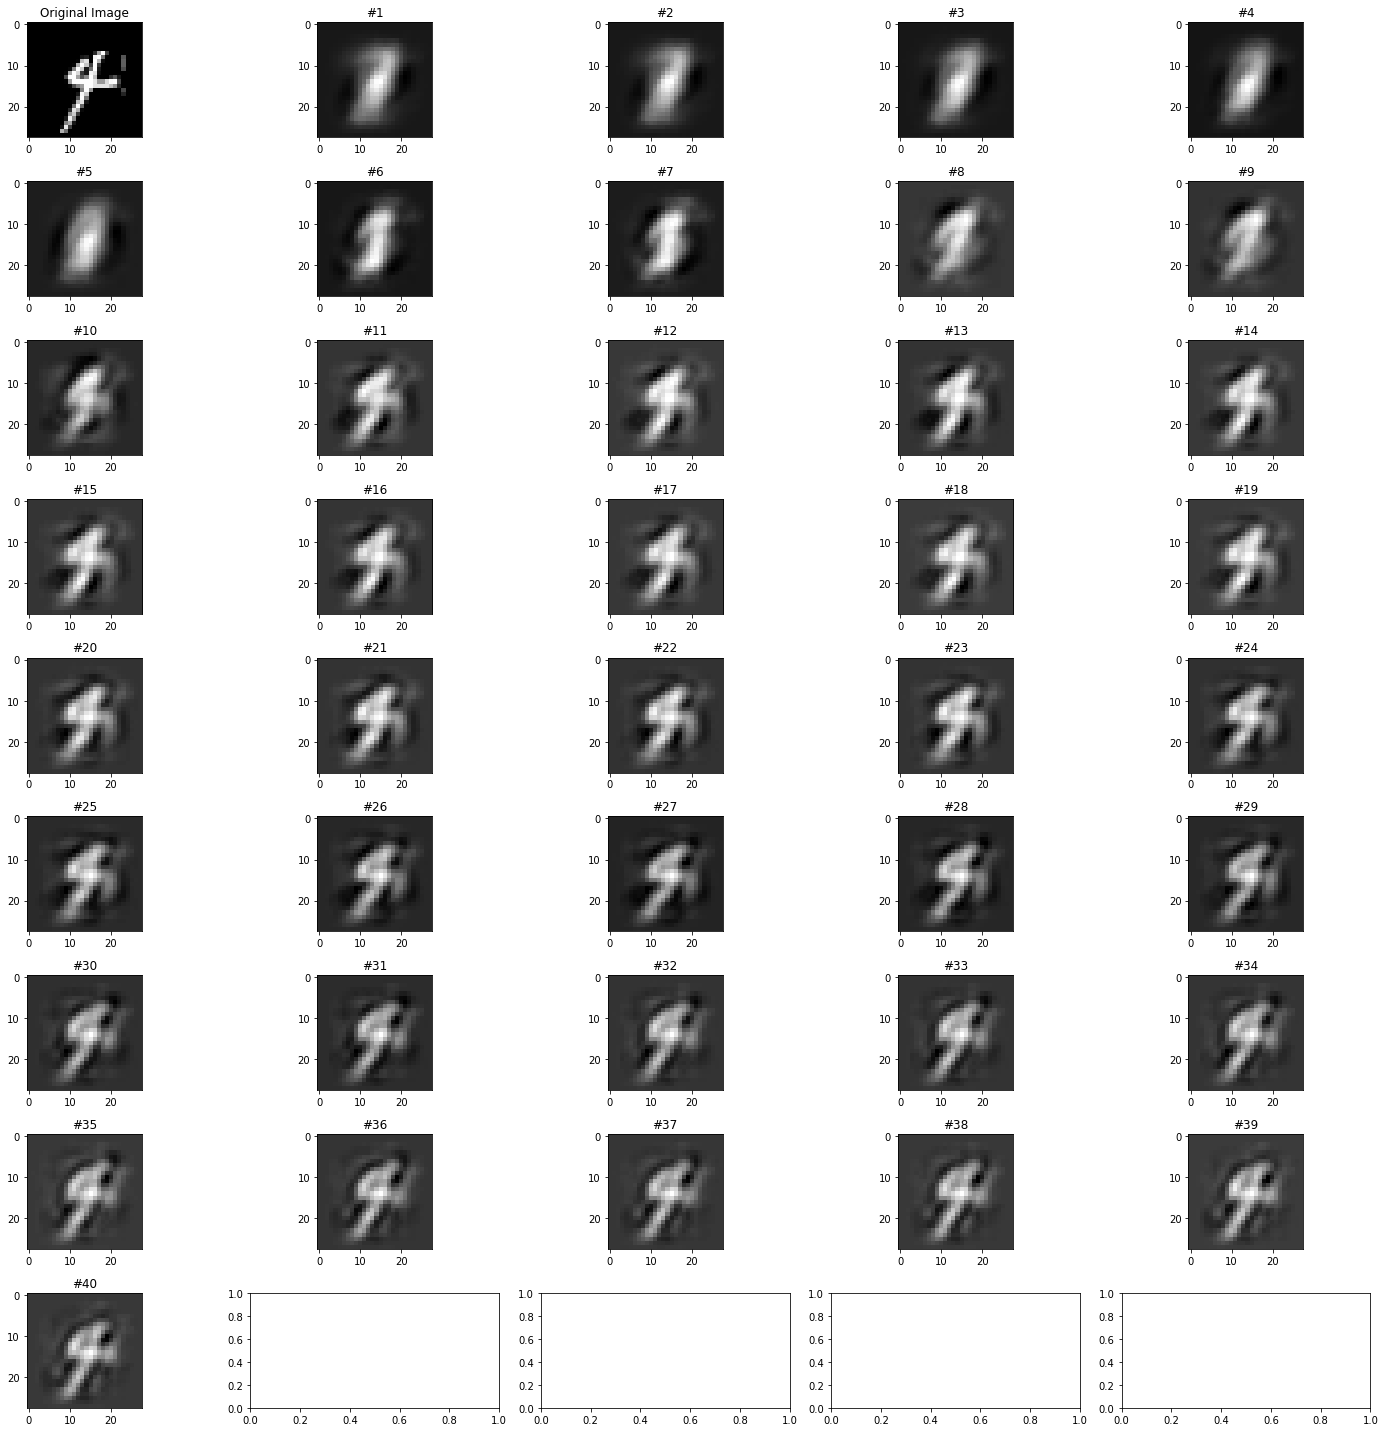

In [ ]:
reconstruction(40)

# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


